In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [79]:
df = pd.read_csv('../data/raw/raw_analyst_ratings.csv')



In [80]:
# Display the first few rows
print(df.head())

# Display basic information about the dataset
print(df.info())

   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

           date stock  
0   6/5/20 0:00     A  
1   6/3/20 0:00     A  
2  5/26/20 0:00     A  
3  5/22/20 0:00     A  
4  5/22/20 0:00     

In [81]:
# Check for missing values
print(df.isnull().sum())

Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64


In [82]:
# Summary statistics for numerical columns
print(df.describe())

# Unique publishers and stocks
print("Unique publishers:", df['publisher'].nunique())
print("Unique stocks:", df['stock'].nunique())

         Unnamed: 0
count  1.048575e+06
mean   5.270714e+05
std    3.041128e+05
min    0.000000e+00
25%    2.637275e+05
50%    5.270880e+05
75%    7.903815e+05
max    1.053772e+06
Unique publishers: 984
Unique stocks: 4590


In [89]:
df['date'] = pd.to_datetime(df['date'], errors='coerce', utc=True)

In [90]:
print(df.isnull().sum())

Unnamed: 0         0
headline           0
url                0
publisher          0
date               0
stock              0
date_only          0
headline_length    0
dtype: int64


Check the distribution of articles over time:

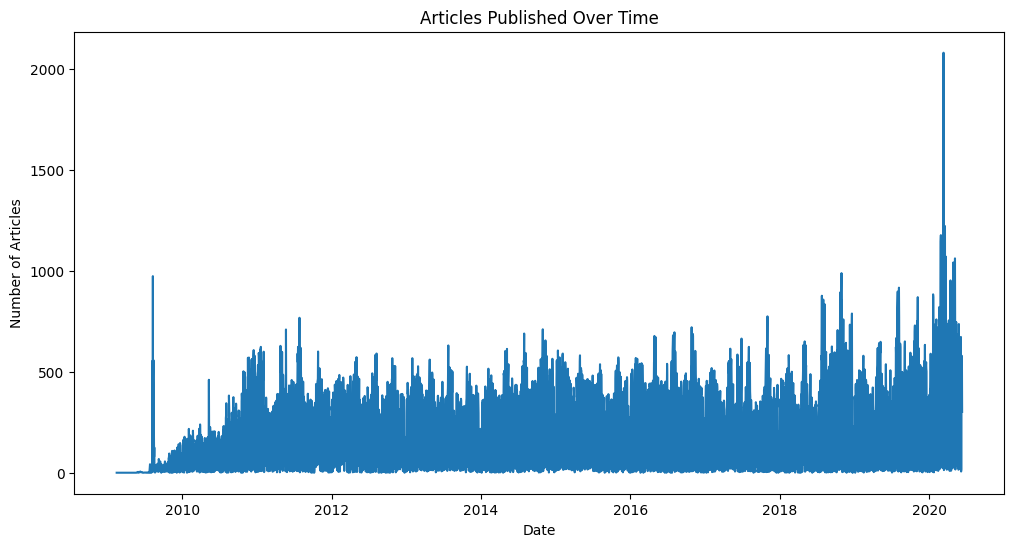

In [86]:
df['date_only'] = df['date'].dt.date  # Extract the date part
articles_per_day = df.groupby('date_only').size()

# Plot
plt.figure(figsize=(12, 6));
articles_per_day.plot(kind='line', title='Articles Published Over Time');
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.show()

#### Publisher Analysis
##### Most frequent publishers:

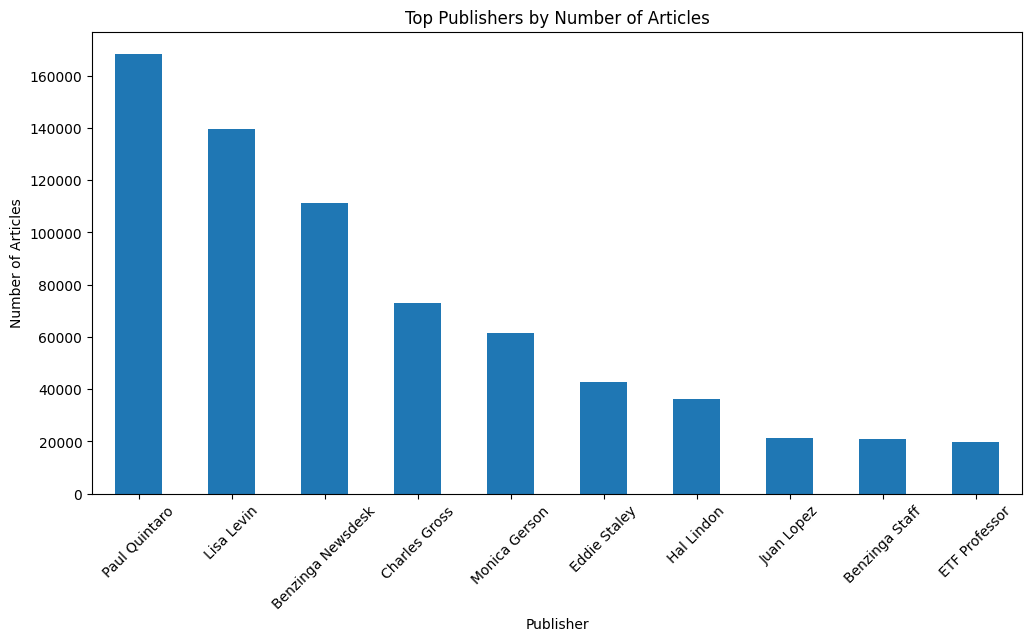

In [87]:
top_publishers = df['publisher'].value_counts().head(10)

# Plot
plt.figure(figsize=(12, 6))
top_publishers.plot(kind='bar', title='Top Publishers by Number of Articles')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()

## Calculate headline lengths:

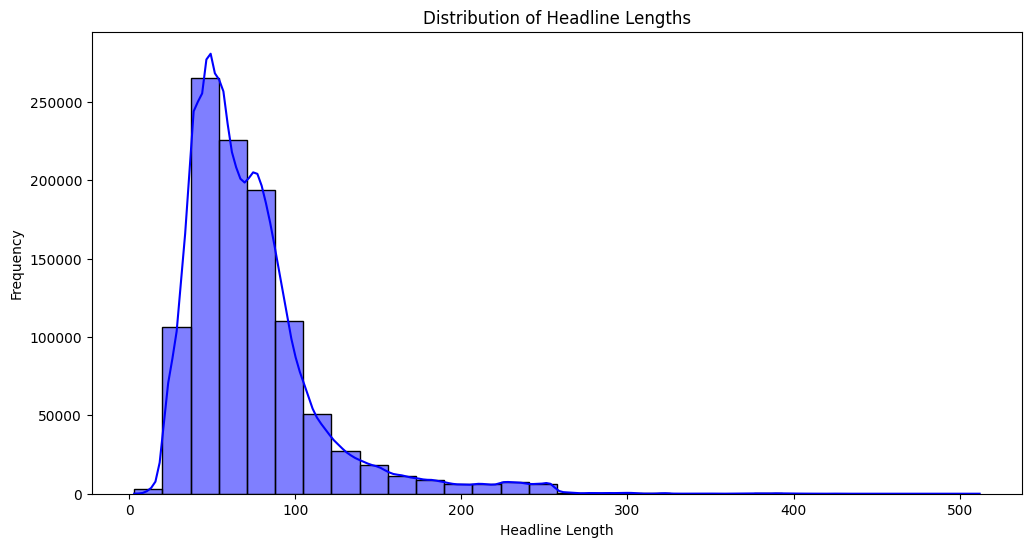

In [88]:
df['headline_length'] = df['headline'].apply(len)

# Plot headline length distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['headline_length'], bins=30, kde=True, color='blue')
plt.title('Distribution of Headline Lengths')
plt.xlabel('Headline Length')
plt.ylabel('Frequency')
plt.show()

In [11]:
print("Headline length statistics:")
print(df['headline_length'].describe())

Headline length statistics:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64
